In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the data
funk_features = pd.read_pickle(open("datasets/funk_features", "rb"))
punk_features = pd.read_pickle(open("datasets/punk_features", "rb"))
rock_features = pd.read_pickle(open("datasets/rock_features", "rb"))
jazz_features = pd.read_pickle(open("datasets/jazz_features", "rb"))

vaporwave_features = pd.read_pickle(open("datasets/vaporwave_features", "rb"))
classical_features = pd.read_pickle(open("datasets/classical_features", "rb"))
hiphop_features    = pd.read_pickle(open("datasets/hiphop_features",    "rb"))
house_features     = pd.read_pickle(open("datasets/house_features",     "rb"))

meditation_features = pd.read_pickle("datasets/meditation_features")
hardcore_features   = pd.read_pickle("datasets/hardcore_features")
kpop_features       = pd.read_pickle("datasets/k-pop_features")
metal_features      = pd.read_pickle("datasets/metal_features")

rap_features    = pd.read_pickle("datasets/rap_features")
soul_features   = pd.read_pickle("datasets/soul_features")
techno_features = pd.read_pickle("datasets/techno_features")
grunge_features = pd.read_pickle("datasets/grunge_features")

In [7]:
# scale the data with z-scaling
def normalize(data):
    min_max_scaler = MinMaxScaler()
    return pd.DataFrame(scale(data), columns = data.columns)

# execute pca with 2 components
def do_pca(data):
    pca = PCA(n_components = 2)
    return pca.fit_transform(data)

In [8]:
indices = list(funk_features.columns)

funk = funk_features.as_matrix()
punk = punk_features.as_matrix()
rock = rock_features.as_matrix()
jazz = jazz_features.as_matrix()

vaporwave = vaporwave_features.as_matrix()
classical = classical_features.as_matrix()
hiphop    = hiphop_features.as_matrix()
house     = house_features.as_matrix()

meditation = meditation_features.as_matrix()
hardcore   = hardcore_features.as_matrix()
metal      = metal_features.as_matrix()
kpop       = kpop_features.as_matrix()

rap    = rap_features.as_matrix()
soul   = soul_features.as_matrix()
techno = techno_features.as_matrix()
grunge = grunge_features.as_matrix()

In [9]:
# get pca with rock and jazz
rockjazz = do_pca(np.vstack((rock_features, jazz_features)))
rock_pca = rockjazz[:len(rock_features)]
jazz_pca = rockjazz[len(rock_features):]

In [12]:
# get normalized data
rock_norm = normalize(rock_features)
jazz_norm = normalize(jazz_features)

In [13]:
# do pca with normalized rock and jazz features
rockjazz_norm = do_pca(np.vstack((rock_norm, jazz_norm)))
rock_pca_norm = rockjazz_norm[:len(rock_norm)]
jazz_pca_norm = rockjazz_norm[len(rock_norm):]

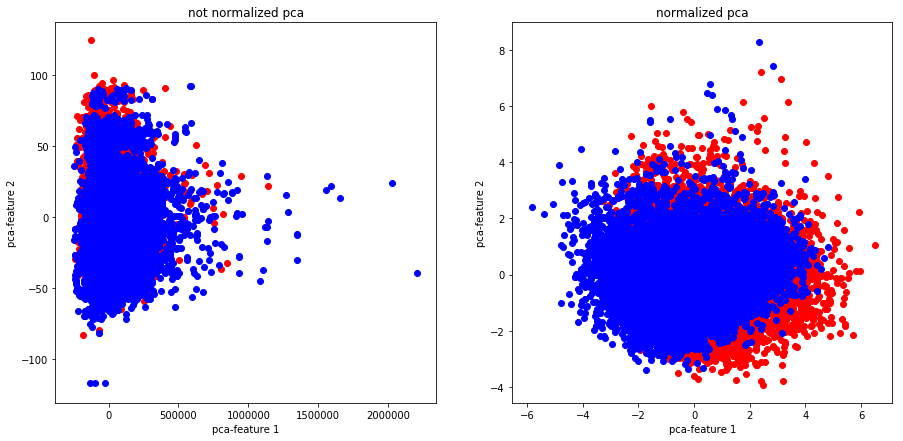

In [17]:
plt.figure(figsize=(15, 7))

# not normalized pca
plt.subplot(1, 2, 1)
plt.scatter(rock_pca[:,0], rock_pca[:,1], c='r')
plt.scatter(jazz_pca[:,0], jazz_pca[:,1], c='b')
plt.title("not normalized pca")
plt.xlabel("pca-feature 1")
plt.ylabel("pca-feature 2")

# normalized pca
plt.subplot(1, 2, 2)
plt.scatter(rock_pca_norm[:,0], rock_pca_norm[:,1], c='r')
plt.scatter(jazz_pca_norm[:,0], jazz_pca_norm[:,1], c='b')
plt.title("normalized pca")
plt.xlabel("pca-feature 1")
plt.ylabel("pca-feature 2")

plt.show()